In [41]:
import sqlite3
conn= sqlite3.connect('sales_data.db')
cursor= conn.cursor()
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""
    CREATE TABLE sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
""")

sales_data = [
    ('Apples', 10, 0.50),
    ('Bananas', 20, 0.30),
    ('Oranges', 15, 0.40),
    ('Apples', 5, 0.50),
    ('Bananas', 10, 0.30),
    ('Oranges', 10, 0.40),
    ('Mangoes', 8, 1.00),
    ('Mangoes', 4, 1.00)
]
cursor.executemany("insert into sales(product,quantity,price) VALUES(?,?,?)",sales_data)
conn.commit()
conn.close()

In [42]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn= sqlite3.connect('sales_data.db')

query= """select * from sales"""
df= pd.read_sql_query(query,conn)
df

,id,product,quantity,price
0,1,Apples,10,0.5
1,2,Bananas,20,0.3
2,3,Oranges,15,0.4
3,4,Apples,5,0.5
4,5,Bananas,10,0.3
5,6,Oranges,10,0.4
6,7,Mangoes,8,1.0
7,8,Mangoes,4,1.0


In [50]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn= sqlite3.connect('sales_data.db')
query = """select product, sum(quantity) as total_quantity, sum(quantity*price)as revenue from sales group by product"""
df= pd.read_sql_query(query,conn)
conn.close()
df

,product,total_quantity,revenue
0,Apples,15,7.5
1,Bananas,30,9.0
2,Mangoes,12,12.0
3,Oranges,25,10.0


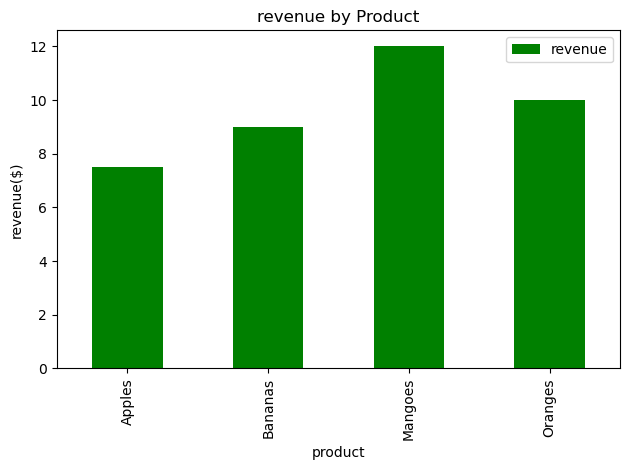

<Figure size 640x480 with 0 Axes>

In [60]:
df.plot(kind='bar', x='product', y='revenue', legend=True, color='Green')
plt.ylabel('revenue($)')
plt.title('revenue by Product')
plt.tight_layout()
plt.show()
plt.savefig("sales_chart.png")